# Задача 1: сравнение предложений

### найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

In [3]:
import numpy as np
import re
from scipy.spatial import distance

fp = open('desktop/sentences.txt', 'r') 

def dict_of_words(words, dict_of_words):
    index = 0
    for word in words:
        dict_of_words[word] = index
        index += 1

def set_of_words(words, unique_words):
    for word in words:
        if word != '':
            word = word.lower()
            unique_words.add(word)
            
def dict_of_sentences(words, dict_of_sentences):
    index = 0
    for key in dict_of_sentences:
        index += 1
    dict_of_sentences[index] = words
    
def matrix_builder(columns, rows):
    output_matrix = np.zeros(len(columns), dtype = int)
    for  centence_index, words in rows.items():
        number_of_columns = len(columns)
        row_vector = np.zeros(number_of_columns, dtype = int)
        for word in words:
            if word in columns:
                row_vector[columns[word]] += 1
        output_matrix = np.vstack([output_matrix, row_vector])
    output_matrix = np.delete(output_matrix, (0), axis=0)
    return output_matrix

def distance_cosine(vector_one, vector_two):
    return distance.cosine(vector_one, vector_two)
                
line = fp.readline()
columns_as_words = {} # словарь с парами "слово:уникальный номер соответствия"
rows_as_sentences = {} # словарь с парами "индекс пердложения:массив слов этого предложения"
unique_words = set()

counter = 1
while line:
    line = line.lower() # приведите каждую строку к нижнему регистру с помощью строковой функции lower()
    line = re.split('[^a-z]', line) # произведите токенизацию, то есть разбиение текстов на слова
    set_of_words(line, unique_words) # список всех слов, встречающихся в предложениях - будущие сталбцы матрицы
    dict_of_sentences(line, rows_as_sentences)
    line = fp.readline()
    counter += 1
    
   
dict_of_words(unique_words, columns_as_words) # Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях
matrix = matrix_builder(columns_as_words, rows_as_sentences) # матрицу размера n * d, где n — число предложений

base_vector = matrix[0]

for vector in matrix:
    print(distance_cosine(base_vector, vector))



0.0
0.9527544408738466
0.8644738145642124
0.8951715163278082
0.7770887149698589
0.9402385695332803
0.7327387580875756
0.9258750683338899
0.8842724875284311
0.9055088817476932
0.8328165362273942
0.8804771390665607
0.8396432548525454
0.8703592552895671
0.8740118423302576
0.9442721787424647
0.8406361854220809
0.956644501523794
0.9442721787424647
0.8885443574849294
0.8427572744917122
0.8250364469440588


# Задача 2: аппроксимация функции

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)


[ 4.36264154 -1.29552587  0.19333685 -0.00823565]
[ 3.32512949 -0.06531159 -0.00760104]
[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


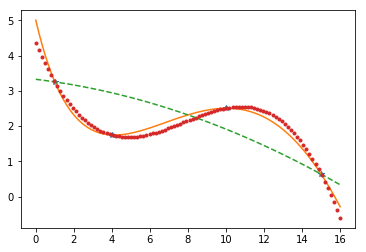

In [4]:
import math 
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return np.sin(x/5) * np.exp(x/10) + 5*np.exp(-x/2)

# [1.,4.,10.,15.]
X = [[1, 1, 1, 1], [1, 4, 16, 64], [1, 10, 100, 1000], [1, 15, 225, 3375]]
Y = [f(1.), f(4.), f(10.), f(15.)]
B = scipy.linalg.solve(X, Y) # [ 4.36264154 -1.29552587  0.19333685 -0.00823565]
print(B)

# апроксимация функции полинома второй степени
X0 = np.array([1,8,15])
Y0 = np.array([f(1.),f(8.),f(15.)])
W0 =  np.polyfit(X0, Y0, 2)
print(np.flip(W0))
p0 = np.poly1d(W0)

# апроксимация функции полинома третей степени
X1 = np.array([1,4,10,15])
Y1 = np.array([f(1.),f(4.),f(10.),f(15.)])
W1 =  np.polyfit(X1, Y1, 3)
print(np.flip(W1))
p1 = np.poly1d(W1)

xp = np.linspace(0,16,100)
_ = plt.plot(X1, Y1, '*', xp, f(xp), '-', xp, p0(xp), '--', xp, p1(xp), '.')
plt.show()